In [18]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# If you want to normalize all numeric data, you might do:
numeric_features = df_market_data.select_dtypes(include=['float64', 'int64'])

#Initialize the StandardScaler
scaler = StandardScaler()

#Fit and transform the data
normalized_data = scaler.fit_transform(numeric_features)



In [11]:
# To check column names in your DataFrame
print(df_market_data.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [12]:


# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(normalized_data, columns=numeric_features.columns)

# Set the coinid column as index
df_scaled['coin_id'] = df_market_data.index

# Set the 'coin_id' as index
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [13]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [15]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using `df_market_data_scaled`
    model.fit(df_scaled)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)


In [16]:

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
import pandas as pd
elbow_curve_df = pd.DataFrame(elbow_curve_data)



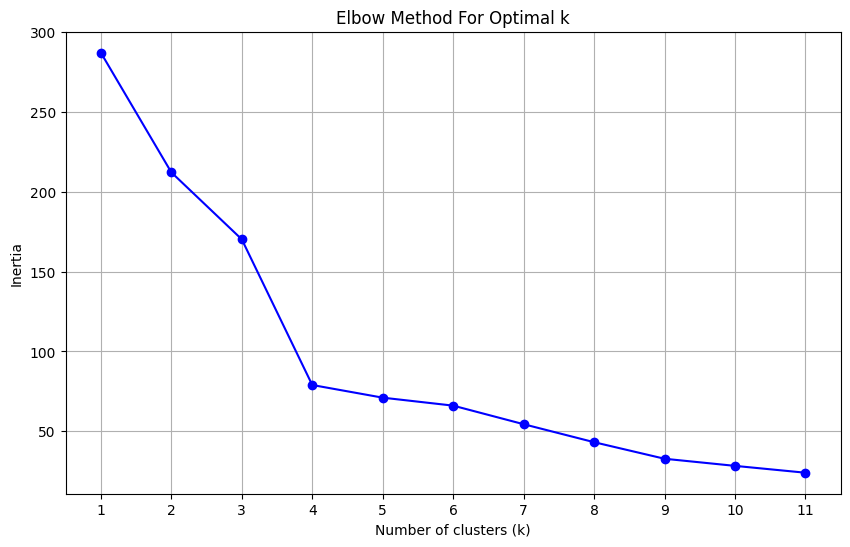

In [19]:

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o', linestyle='-', color='b')  # Plot k vs. inertia
plt.title('Elbow Method For Optimal k')  # Title of the plot
plt.xlabel('Number of clusters (k)')  # X-axis label
plt.ylabel('Inertia')  # Y-axis label
plt.xticks(elbow_curve_df['k'])  # Ensure all k-values are used as ticks
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [22]:

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)


In [23]:
# Fit the K-Means model using the scaled data
# Assuming `df_market_data_scaled` is your DataFrame with the scaled market data
kmeans_model.fit(df_scaled)


KMeans(n_clusters=4, random_state=42)

In [24]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [25]:
# Create a copy of the DataFrame
df_scaled_copy = df_scaled.copy()



In [26]:

# Add a new column to the DataFrame with the predicted clusters
df_scaled_copy['Cluster'] = cluster_labels

# Display sample data to see the new column with cluster assignments
print(df_scaled_copy.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [28]:

# Create the scatter plot using hvPlot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],  # This attempts to include coin_id from the index in the hover tool
    colormap='Category10',  # Use a predefined colormap for distinct cluster colors
    title='Crypto 24h vs. 7d Price Change Percentage by Cluster',
    xlabel='24h Price Change Percentage',
    ylabel='7d Price Change Percentage',
    height=400,
    width=600
)


scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [29]:

# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)


In [30]:

# Use the PCA model with `fit_transform` to reduce to three principal components
pca_data = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# If your original DataFrame has an index (like 'coin_id'), you might want to set it to the new PCA DataFrame
pca_df.index = df_scaled.index

# View the first five rows of the DataFrame
print(pca_df.head())



              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                   -0.600667               0.842760   
ethereum                  -0.458261               0.458466   
tether                    -0.433070              -0.168126   
ripple                    -0.471835              -0.222660   
bitcoin-cash              -1.157800               2.041209   

              Principal Component 3  
coin_id                              
bitcoin                    0.461595  
ethereum                   0.952877  
tether                    -0.641752  
ripple                    -0.479053  
bitcoin-cash               1.859715  


In [31]:
# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print("Explained Variance by Component:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}")


Explained Variance by Component:
Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .895 or 89.5%

In [32]:
# Create a new DataFrame with the PCA data.

pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

pca_df.index = df_scaled.index

print(pca_df.head())



              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                   -0.600667               0.842760   
ethereum                  -0.458261               0.458466   
tether                    -0.433070              -0.168126   
ripple                    -0.471835              -0.222660   
bitcoin-cash              -1.157800               2.041209   

              Principal Component 3  
coin_id                              
bitcoin                    0.461595  
ethereum                   0.952877  
tether                    -0.641752  
ripple                    -0.479053  
bitcoin-cash               1.859715  


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))



In [34]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_list = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using 'pca_df'
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_list.append(kmeans.inertia_)

# After the loop, you have the inertia values for each k
print(inertia_list)


[256.8740855678924, 182.3395300777564, 140.43183298408363, 49.66549665179735, 42.05190109791724, 31.749005244389004, 28.03186917255274, 19.45174720604134, 13.814081971558089, 10.63064757387096, 10.120242629957751]


In [49]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data2 = {
    'k': range(1, 12),
    'inertia': inertia_list
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df2 = pd.DataFrame(elbow_curve_data2)



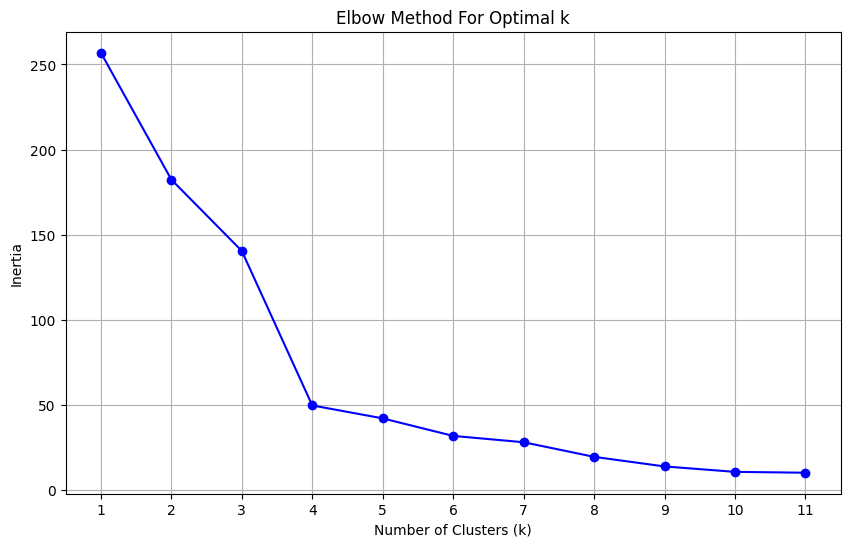

In [50]:

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(elbow_curve_df2['k'], elbow_curve_df2['inertia'], marker='o', linestyle='-', color='blue')
plt.title('Elbow Method For Optimal k')  # Title of the plot
plt.xlabel('Number of Clusters (k)')  # X-axis label
plt.ylabel('Inertia')  # Y-axis label
plt.xticks(elbow_curve_df2['k'])  # Ensure x-axis ticks represent each k-value
plt.grid(True)  # Show grid for easier analysis
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [37]:

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)



In [39]:

# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)




KMeans(n_clusters=4, random_state=42)

In [41]:


# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values
print(cluster_labels)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [42]:
# Step 1: Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Step 2: Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = cluster_labels

# Step 3: Display sample data
print(pca_df_copy.head())


              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                   -0.600667               0.842760   
ethereum                  -0.458261               0.458466   
tether                    -0.433070              -0.168126   
ripple                    -0.471835              -0.222660   
bitcoin-cash              -1.157800               2.041209   

              Principal Component 3  Cluster  
coin_id                                       
bitcoin                    0.461595        0  
ethereum                   0.952877        0  
tether                    -0.641752        2  
ripple                    -0.479053        2  
bitcoin-cash               1.859715        0  


In [58]:
# Use of hvPlot to create the scatter plot
scatter_plot = pca_df_copy.hvplot.scatter(
    x='Principal Component 1',  
    y='Principal Component 2', 
    by='Cluster',
    hover_cols=['coin_id'],  
    colormap='Category10', 
    title='Cryptocurrency Clusters: PC1 vs PC2', 
    xlabel='Principal Component 1 (PC1)', 
    ylabel='Principal Component 2 (PC2)',
    width=600, 
    height=400
)

scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [Principal Component 1]   (Principal Component 2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

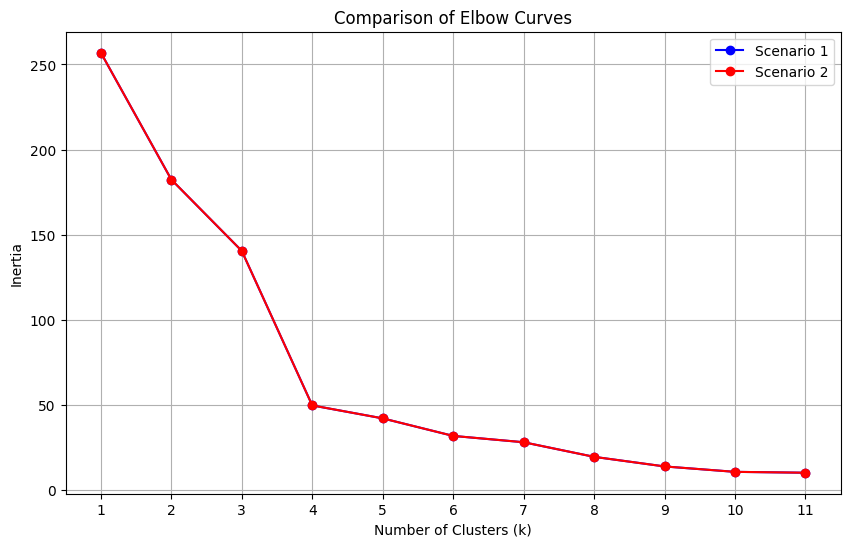

In [53]:
# Assuming 'k' is the column for k-values and 'inertia' is the column for inertia values in your DataFrame
k_values = elbow_curve_data['k']  # Assuming the k-values are the same across both datasets
inertia_values1 = elbow_curve_data['inertia']
inertia_values2 = elbow_curve_data2['inertia']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values1, marker='o', linestyle='-', color='blue', label='Scenario 1')
plt.plot(k_values, inertia_values2, marker='o', linestyle='-', color='red', label='Scenario 2')
plt.title('Comparison of Elbow Curves')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [59]:
import hvplot.pandas

# First plot: Clusters based on Principal Component 1 and Principal Component 2
plot1 = pca_df_copy.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    by='Cluster',
    hover_cols=[pca_df_copy.index.name],  # Assuming 'coin_id' is in the index
    colormap='Category10',
    title='Clusters in PC1 vs PC2 Space',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    width=400,
    height=300
)

# Second plot: Viewing Principal Component 3 (as color) in the PC1 vs PC2 space
plot2 = pca_df_copy.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    c='Principal Component 3',
    hover_cols=[pca_df_copy.index.name],
    colormap='viridis',
    title='PC3 Variation in PC1 vs PC2 Space',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    width=400,
    height=300,
    colorbar=True
)

# Display the plots side by side
composite_plot = plot1 + plot2

composite_plot


:Layout
   .NdOverlay.I :NdOverlay   [Cluster]
      :Scatter   [Principal Component 1]   (Principal Component 2,coin_id)
   .Scatter.I   :Scatter   [Principal Component 1]   (Principal Component 2,Principal Component 3,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features made the data signifcantly easier to understand and interpret. ALthough some accuarcy may be sacraficed the additional level of detail and clarity that comes with fewer features provides immense value.